# Simulation of the bitcoin price with the Monte Carlo method

We are going to launch ourselves to carry out a simulation of the bitcoin price with the Monte Carlo method together with the Black-Scholes-Merton model and thus calculate the different price predictions from a year ago to today.
It is a simulation with some evil, since a year ago we were close to the maximum price (ATH) and this last year the price of BTC has suffered one of the biggest falls in its history, but that is exactly what we want to see what percentage of the paths generated by this method are close to the current reality of the BTC price, in one of the most complicated scenarios that can occur.
To clarify, first of all, that a Monte Carlo simulation with the Black-Shcoles-Merton equation does not seem to be a good method to predict the price of bitcoin in such a long term, since the degree of randomness is very high this due to the variability of supply and demand, the difficulty of estimating a possible fundamental value as there are no underlying assets and also being influenced by macroeconomic data that ultimately intervenes as an exogenous variable, make, in my opinion, that the price evolution is incalculable one year ahead.

# What is the Monte Carlo method?

They are a set of techniques that allow obtaining solutions to mathematical, physical, economic problems... through repeated random tests.

With the Monte Carlo method possible resulting scenarios (simulations) are generated from a series of initial data and one or more random variables, the different resulting solutions can be used to calculate formulas, such as in the case of calculating the number pi, to forecast possible future scenarios as in the case that we will deal with here when using it together with the Black-Sholes-Merton stochastic equation and for many other uses within mathematics, physics, economics...

Yahoo Finance module for Python is installed.

In [1]:
 !pip install yfinance > /dev/null

The libraries to be used in the study are imported.

In [2]:
import pandas as pd
import numpy as np
import math
from time import time
import requests
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

The bitcoin price data is downloaded from Yahoo finance.

In [3]:
df = yf.download('BTC-USD', interval = '1d')[['Close']]

[*********************100%***********************]  1 of 1 completed


This is the formula of the Black-Scholes-Merton (1973 stochastic differential equation (SDE) economic model that we will use to generate the simulation.

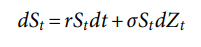

The Euler discretized version of SDE is used to make it easier to convert to Python code.

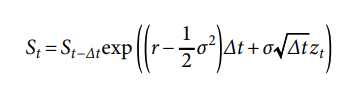

Calculation of the necessary parameters for the equation.

In [4]:
# Parameters: sigma, r, S0, dt, I

# Calculation of volatility, in the formula it refers to the intrinsic but we will use the annualized
volatility_days = 30
df['pct_change'] = df['Close'].pct_change()*100
df['stdev'] = df['pct_change'].rolling(volatility_days).std()

# Number of annual daily sessions. In the case of the stock market it is 252 but for bitcon it is 365 because it works every day
df['vol'] = df['stdev']*(365**0.5)
df.dropna(inplace=True)

sigma = df.vol.mean() / 100

# Maturity. Option expiration date. We set it to 1
T = 1

# Calculation of r (riskless short rate)
# The rate of return expected by investors (r) can be estimated from the CAMP model
# r = rf + beta * mrp
# rf: is the risk-free rate -> rf = 0.0020
# mrp: is a market risk premium. -> mrp = 0.0438
r = 0.0020 + 0.94 * 0.0438

# The number of days to simulate
M = 365

# Closing price of bitcoin from which the simulation will start
S0 = df.Close[-M]

# Length of time interval
dt = T / M

# Number of paths to simulate
I = 20000 

print("S0, initial day: \t", S0)
print("r, riskless short rate: ", r)
print("M, number of days: \t", M)
print("I, paths simulating: \t", I)

S0, initial day: 	 49368.84765625
r, riskless short rate:  0.043171999999999995
M, number of days: 	 365
I, paths simulating: 	 20000


In [5]:
# Simulating I paths with M days (time steps)
S = S0 * np.exp(np.cumsum((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * np.random.standard_normal((M + 1, I)), axis=0))
S[0] = S0

The graph with 20 simulations plus the variation of the real price is shown in black (+).

Text(0, 0.5, 'BTC(USD)')

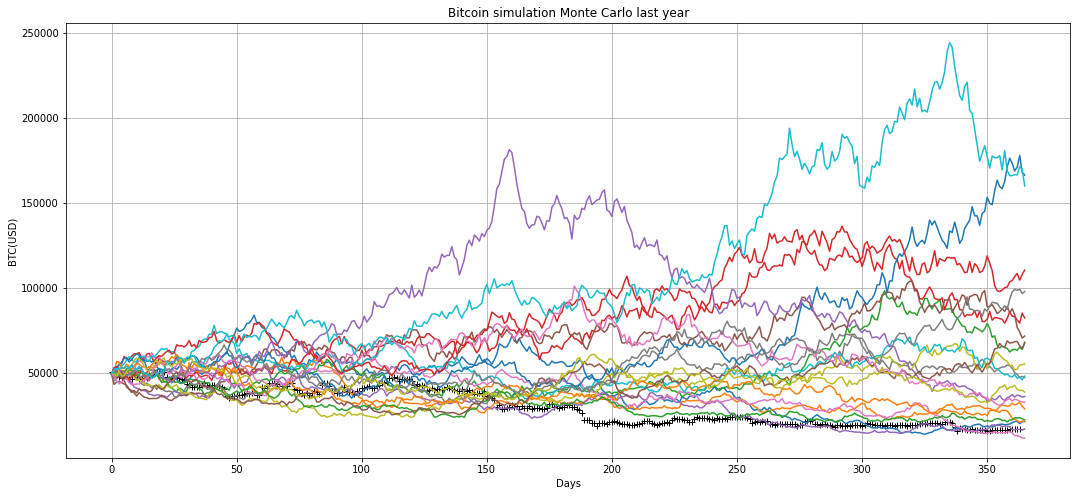

In [6]:
# Real price ot BTC
real = df[(df.index > df.index[-M])]['Close']

plt.figure(figsize=(18,8))
plt.title('Bitcoin simulation Monte Carlo last year')
plt.plot(real.values, 'k+')
plt.plot(S[:, :20])
plt.grid(True)
plt.xlabel('Days')
plt.ylabel('BTC(USD)')

Graph with the distribution of the closing prices simulated at the end of the 365 days with two vertical lines in red indicating the values above and below 10% and with the real price line in black.

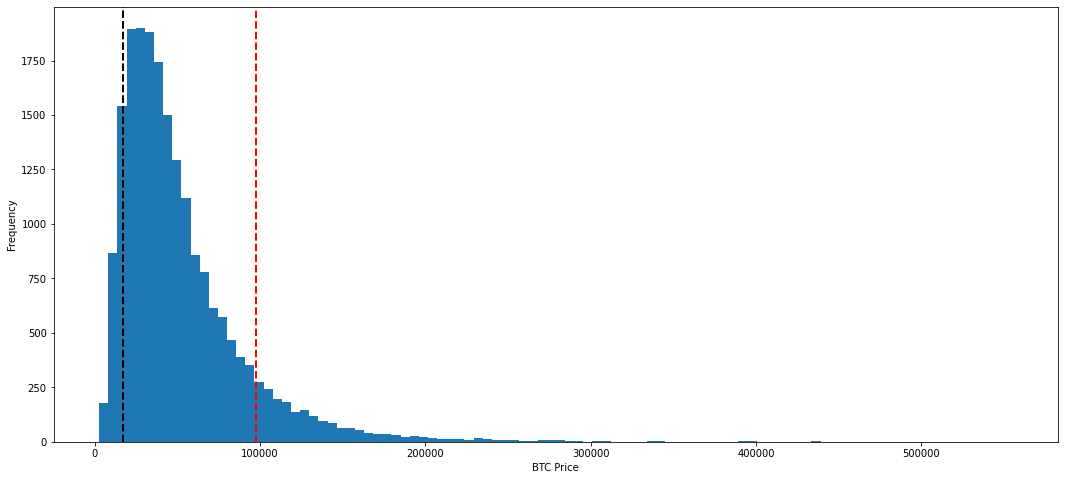

In [7]:
closing_prices = S[-1]
top_ten = np.percentile(closing_prices, 100-10)

# Pull bottom 10% of possible outcomes
bottom_ten = np.percentile(closing_prices, 10);

plt.figure(figsize=(18,8))
plt.hist(closing_prices, bins=100)
plt.axvline(top_ten,color='r', linestyle='dashed', linewidth=2)
plt.axvline(bottom_ten,color='r', linestyle='dashed', linewidth=2)
plt.axvline(real.values[-1],color='k', linestyle='dashed', linewidth=2)
plt.xlabel('BTC Price')
plt.ylabel('Frequency')
plt.show()

In [8]:
print("Expected BTC price: \t", round(np.mean(closing_prices), 2))
print("Quantile (5%): \t\t", np.percentile(closing_prices, 5))
print("Quantile (95%): \t", np.percentile(closing_prices, 95))

Expected BTC price: 	 51892.19
Quantile (5%): 		 13656.425038591678
Quantile (95%): 	 124992.2848675734


Number of simulations that have been generated, including those with a lower price than today and the percentage that these represent with respect to the total.

In [9]:
df1_T = pd.DataFrame(S[-1:, :I]).T
df1_T.columns = ['btc_price_last_day']
print("Nº simulations: \t\t\t", df1_T.count())
print("Nº simulatios less price today: \t", df1_T[(df1_T['btc_price_last_day'] < df.Close[-1])].count())
print("Average simulatios less price today: \t", df1_T[(df1_T['btc_price_last_day'] < df.Close[-1])].count()*100/df1_T.count())

Nº simulations: 			 btc_price_last_day    20000
dtype: int64
Nº simulatios less price today: 	 btc_price_last_day    1864
dtype: int64
Average simulatios less price today: 	 btc_price_last_day    9.32
dtype: float64


# Conclusions
We have spent a year with one of the biggest BTC price drops in history, several factors have come together, unfavorable macroeconomic news for the economy, the fall of large crypto companies with the loss of funds from their clients and also within the periods cyclical events that occur every 4 years in bitcoin due to the halving we are in the part that has historically been bearish.
As we mentioned at the beginning, the Monte Carlo simulation is not useful for us to predict the price one year ahead, but it is useful for us to know that of all the possible scenarios we are close to 5% worse, which indicates what has been said, we are fully involved in a crypto winter